(<matplotlib.axes._subplots.AxesSubplot at 0xaa00026ef0>,
 Text(0.5,1,'center'))

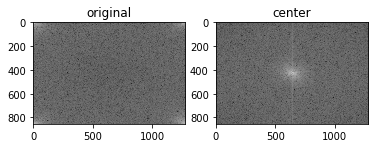

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r'D:\3.jpg',0) #直接读为灰度图像
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到较小的范围（比如0-255）
s1 = np.log(np.abs(f))
s2 = np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(s1,'gray'),plt.title('original')
plt.subplot(122),plt.imshow(s2,'gray'),plt.title('center')


(<matplotlib.axes._subplots.AxesSubplot at 0xaa7d65e668>,
 Text(0.5,1,'center'))

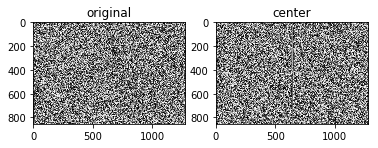

In [3]:
#显示相位图
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r'D:\3.jpg',0) #直接读为灰度图像
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)#中心化
#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到较小的范围（比如0-255）
ph_f = np.angle(f)
ph_fshift = np.angle(fshift)

plt.subplot(121),plt.imshow(ph_f,'gray'),plt.title('original')
plt.subplot(122),plt.imshow(ph_fshift,'gray'),plt.title('center')


(<matplotlib.axes._subplots.AxesSubplot at 0xaa0013ac50>,
 Text(0.5,1,'img back'))

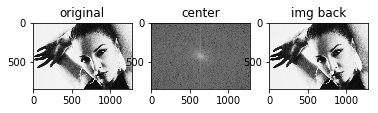

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r'D:\3.jpg',0) #直接读为灰度图像
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到0-255
s1 = np.log(np.abs(fshift))
plt.subplot(131),plt.imshow(img,'gray'),plt.title('original')
plt.subplot(132),plt.imshow(s1,'gray'),plt.title('center')
# 逆变换
f1shift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f1shift)
#出来的是复数，无法显示
img_back = np.abs(img_back)
plt.subplot(133),plt.imshow(img_back,'gray'),plt.title('img back')

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

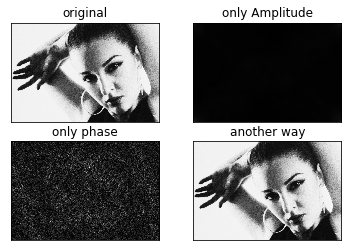

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r'D:\3.jpg',0) #直接读为灰度图像
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到0-255
s1 = np.log(np.abs(fshift))
plt.subplot(221),plt.imshow(img,'gray'),plt.title('original')
plt.xticks([]),plt.yticks([])
#---------------------------------------------
# 逆变换--取绝对值就是振幅
f1shift = np.fft.ifftshift(np.abs(fshift))
img_back = np.fft.ifft2(f1shift)
#出来的是复数，无法显示
img_back = np.abs(img_back)
#调整大小范围便于显示
img_back = (img_back-np.amin(img_back))/(np.amax(img_back)-np.amin(img_back))
plt.subplot(222),plt.imshow(img_back,'gray'),plt.title('only Amplitude')
plt.xticks([]),plt.yticks([])
#---------------------------------------------
# 逆变换--取相位
f2shift = np.fft.ifftshift(np.angle(fshift))
img_back = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_back = np.abs(img_back)
#调整大小范围便于显示
img_back = (img_back-np.amin(img_back))/(np.amax(img_back)-np.amin(img_back))
plt.subplot(223),plt.imshow(img_back,'gray'),plt.title('only phase')
plt.xticks([]),plt.yticks([])
#---------------------------------------------
# 逆变换--将两者合成看看
s1 = np.abs(fshift) #取振幅
s1_angle = np.angle(fshift) #取相位
s1_real = s1*np.cos(s1_angle) #取实部
s1_imag = s1*np.sin(s1_angle) #取虚部
s2 = np.zeros(img.shape,dtype=complex) 
s2.real = np.array(s1_real) #重新赋值给s2
s2.imag = np.array(s1_imag)

f2shift = np.fft.ifftshift(s2) #对新的进行逆变换
img_back = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_back = np.abs(img_back)
#调整大小范围便于显示
img_back = (img_back-np.amin(img_back))/(np.amax(img_back)-np.amin(img_back))
plt.subplot(224),plt.imshow(img_back,'gray'),plt.title('another way')
plt.xticks([]),plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

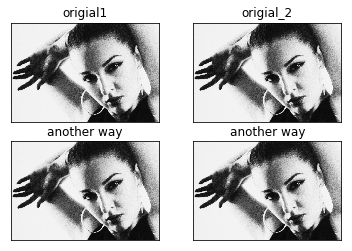

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_flower = cv2.imread(r'D:\3.jpg',0) #直接读为灰度图像
img_man = cv2.imread(r'D:\3.jpg',0) #直接读为灰度图像
plt.subplot(221),plt.imshow(img_flower,'gray'),plt.title('origial1')
plt.xticks([]),plt.yticks([])
plt.subplot(222),plt.imshow(img_man,'gray'),plt.title('origial_2')
plt.xticks([]),plt.yticks([])
#--------------------------------
f1 = np.fft.fft2(img_flower)
f1shift = np.fft.fftshift(f1)
f1_A = np.abs(f1shift) #取振幅
f1_P = np.angle(f1shift) #取相位
#--------------------------------
f2 = np.fft.fft2(img_man)
f2shift = np.fft.fftshift(f2)
f2_A = np.abs(f2shift) #取振幅
f2_P = np.angle(f2shift) #取相位
#---图1的振幅--图2的相位--------------------
img_new1_f = np.zeros(img_flower.shape,dtype=complex) 
img1_real = f1_A*np.cos(f2_P) #取实部
img1_imag = f1_A*np.sin(f2_P) #取虚部
img_new1_f.real = np.array(img1_real) 
img_new1_f.imag = np.array(img1_imag) 
f3shift = np.fft.ifftshift(img_new1_f) #对新的进行逆变换
img_new1 = np.fft.ifft2(f3shift)
#出来的是复数，无法显示
img_new1 = np.abs(img_new1)
#调整大小范围便于显示
img_new1 = (img_new1-np.amin(img_new1))/(np.amax(img_new1)-np.amin(img_new1))
plt.subplot(223),plt.imshow(img_new1,'gray'),plt.title('another way')
plt.xticks([]),plt.yticks([])
#---图2的振幅--图1的相位--------------------
img_new2_f = np.zeros(img_flower.shape,dtype=complex) 
img2_real = f2_A*np.cos(f1_P) #取实部
img2_imag = f2_A*np.sin(f1_P) #取虚部
img_new2_f.real = np.array(img2_real) 
img_new2_f.imag = np.array(img2_imag) 
f4shift = np.fft.ifftshift(img_new2_f) #对新的进行逆变换
img_new2 = np.fft.ifft2(f4shift)
#出来的是复数，无法显示
img_new2 = np.abs(img_new2)
#调整大小范围便于显示
img_new2 = (img_new2-np.amin(img_new2))/(np.amax(img_new2)-np.amin(img_new2))
plt.subplot(224),plt.imshow(img_new2,'gray'),plt.title('another way')
plt.xticks([]),plt.yticks([])


TypeError: slice indices must be integers or None or have an __index__ method

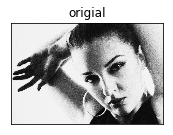

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_man = cv2.imread(r'D:\3.jpg',0) #直接读为灰度图像
plt.subplot(121),plt.imshow(img_man,'gray'),plt.title('origial')
plt.xticks([]),plt.yticks([])
#--------------------------------
rows,cols = img_man.shape
mask = np.ones(img_man.shape,np.uint8)
mask[rows/2-30:rows/2+30,cols/2-30:cols/2+30] = 0
#--------------------------------
f1 = np.fft.fft2(img_man)
f1shift = np.fft.fftshift(f1)
f1shift = f1shift*mask
f2shift = np.fft.ifftshift(f1shift) #对新的进行逆变换
img_new = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_new = np.abs(img_new)
#调整大小范围便于显示
img_new = (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))
plt.subplot(122),plt.imshow(img_new,'gray'),plt.title('Highpass')
plt.xticks([]),plt.yticks([])


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

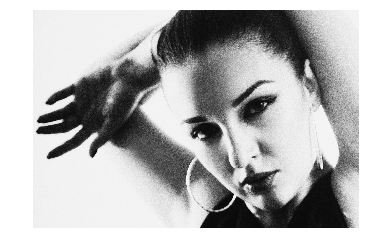

In [2]:
img = cv2.imread(r'D:\3.jpg',0) #直接读为灰度图像
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.show()

In [3]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

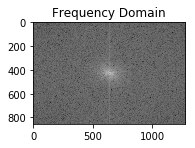

In [4]:
#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到0-255
s1 = np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(s1,'gray')
plt.title('Frequency Domain')
plt.show()

In [5]:
def make_transform_matrix(d,image):
    transfor_matrix = np.zeros(image.shape)
    center_point = tuple(map(lambda x:(x-1)/2,s1.shape))
    for i in range(transfor_matrix.shape[0]):
        for j in range(transfor_matrix.shape[1]):
            def cal_distance(pa,pb):
                from math import sqrt
                dis = sqrt((pa[0]-pb[0])**2+(pa[1]-pb[1])**2)
                return dis
            dis = cal_distance(center_point,(i,j))
            if dis <= d:
                transfor_matrix[i,j]=1
            else:
                transfor_matrix[i,j]=0
    return transfor_matrix

d_1 = make_transform_matrix(15,fshift)
d_2 = make_transform_matrix(50,fshift)
d_3 = make_transform_matrix(150,fshift)

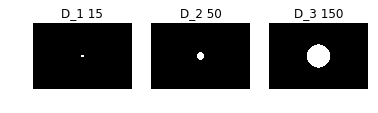

In [6]:
plt.subplot(131)
plt.axis("off")
plt.imshow(d_1,cmap="gray")
plt.title('D_1 15')
plt.subplot(132)
plt.axis("off")
plt.title('D_2 50')
plt.imshow(d_2,cmap="gray")
plt.subplot(133)
plt.axis("off")
plt.title("D_3 150")
plt.imshow(d_3,cmap="gray")
plt.show()

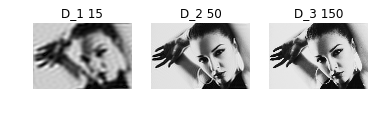

In [7]:
img_d1 = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift*d_1)))
img_d2 = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift*d_2)))
img_d3 = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift*d_3)))
plt.subplot(131)
plt.axis("off")
plt.imshow(img_d1,cmap="gray")
plt.title('D_1 15')
plt.subplot(132)
plt.axis("off")
plt.title('D_2 50')
plt.imshow(img_d2,cmap="gray")
plt.subplot(133)
plt.axis("off")
plt.title("D_3 150")
plt.imshow(img_d3,cmap="gray")
plt.show()

In [8]:
def lowPassFilter(image,d):#低通滤波器
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    
    def make_transform_matrix(d):
        transfor_matrix = np.zeros(image.shape)
        center_point = tuple(map(lambda x:(x-1)/2,s1.shape))
        for i in range(transfor_matrix.shape[0]):
            for j in range(transfor_matrix.shape[1]):
                def cal_distance(pa,pb):
                    from math import sqrt
                    dis = sqrt((pa[0]-pb[0])**2+(pa[1]-pb[1])**2)
                    return dis
                dis = cal_distance(center_point,(i,j))
                if dis <= d:
                    transfor_matrix[i,j]=1
                else:
                    transfor_matrix[i,j]=0
        return transfor_matrix
    d_matrix = make_transform_matrix(d)
    new_img = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift*d_matrix)))
    return new_img

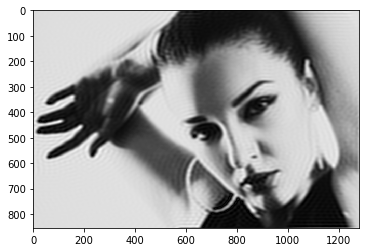

In [9]:
plt.imshow(lowPassFilter(img,60),cmap="gray")

In [10]:
def highPassFilter(image,d):#高通滤波器
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)   
    def make_transform_matrix(d):
        transfor_matrix = np.zeros(image.shape)
        center_point = tuple(map(lambda x:(x-1)/2,s1.shape))
        for i in range(transfor_matrix.shape[0]):
            for j in range(transfor_matrix.shape[1]):
                def cal_distance(pa,pb):
                    from math import sqrt
                    dis = sqrt((pa[0]-pb[0])**2+(pa[1]-pb[1])**2)
                    return dis
                dis = cal_distance(center_point,(i,j))
                if dis <= d:
                    transfor_matrix[i,j]=0
                else:
                    transfor_matrix[i,j]=1
        return transfor_matrix
    d_matrix = make_transform_matrix(d)
    new_img = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift*d_matrix)))
    return new_img

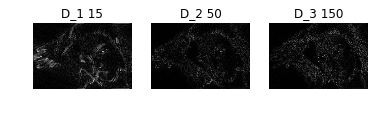

In [11]:
img_d1 = highPassFilter(img,15)
img_d2 = highPassFilter(img,50)
img_d3 = highPassFilter(img,150)
plt.subplot(131)
plt.axis("off")
plt.imshow(img_d1,cmap="gray")
plt.title('D_1 15')
plt.subplot(132)
plt.axis("off")
plt.title('D_2 50')
plt.imshow(img_d2,cmap="gray")
plt.subplot(133)
plt.axis("off")
plt.title("D_3 150")
plt.imshow(img_d3,cmap="gray")
plt.show()

In [13]:
def GaussianHighFilter(image,d):#高斯高通滤波器
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    def make_transform_matrix(d):
        transfor_matrix = np.zeros(image.shape)
        center_point = tuple(map(lambda x:(x-1)/2,s1.shape))
        for i in range(transfor_matrix.shape[0]):
            for j in range(transfor_matrix.shape[1]):
                def cal_distance(pa,pb):
                    from math import sqrt
                    dis = sqrt((pa[0]-pb[0])**2+(pa[1]-pb[1])**2)
                    return dis
                dis = cal_distance(center_point,(i,j))
                transfor_matrix[i,j] = 1-np.exp(-(dis**2)/(2*(d**2)))
        return transfor_matrix
    d_matrix = make_transform_matrix(d)
    new_img = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift*d_matrix)))
    return new_img

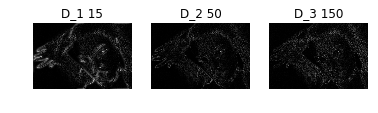

In [14]:
img_d1 = GaussianHighFilter(img,15)
img_d2 = GaussianHighFilter(img,50)
img_d3 = GaussianHighFilter(img,150)
plt.subplot(131)
plt.axis("off")
plt.imshow(img_d1,cmap="gray")
plt.title('D_1 15')
plt.subplot(132)
plt.axis("off")
plt.title('D_2 50')
plt.imshow(img_d2,cmap="gray")
plt.subplot(133)
plt.axis("off")
plt.title("D_3 150")
plt.imshow(img_d3,cmap="gray")
plt.show()

In [15]:
def GaussianLowFilter(image,d):#高斯低通滤波
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    def make_transform_matrix(d):
        transfor_matrix = np.zeros(image.shape)
        center_point = tuple(map(lambda x:(x-1)/2,s1.shape))
        for i in range(transfor_matrix.shape[0]):
            for j in range(transfor_matrix.shape[1]):
                def cal_distance(pa,pb):
                    from math import sqrt
                    dis = sqrt((pa[0]-pb[0])**2+(pa[1]-pb[1])**2)
                    return dis
                dis = cal_distance(center_point,(i,j))
                transfor_matrix[i,j] = np.exp(-(dis**2)/(2*(d**2)))
        return transfor_matrix
    d_matrix = make_transform_matrix(d)
    new_img = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift*d_matrix)))
    return new_img

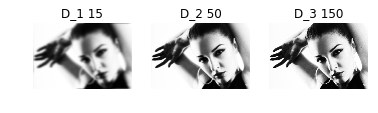

In [16]:
img_d1 = GaussianLowFilter(img,15)
img_d2 = GaussianLowFilter(img,50)
img_d3 = GaussianLowFilter(img,150)
plt.subplot(131)
plt.axis("off")
plt.imshow(img_d1,cmap="gray")
plt.title('D_1 15')
plt.subplot(132)
plt.axis("off")
plt.title('D_2 50')
plt.imshow(img_d2,cmap="gray")
plt.subplot(133)
plt.axis("off")
plt.title("D_3 150")
plt.imshow(img_d3,cmap="gray")
plt.show()

In [17]:
def butterworthPassFilter(image,d,n):#巴特沃斯
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    
    def make_transform_matrix(d):
        transfor_matrix = np.zeros(image.shape)
        center_point = tuple(map(lambda x:(x-1)/2,s1.shape))
        for i in range(transfor_matrix.shape[0]):
            for j in range(transfor_matrix.shape[1]):
                def cal_distance(pa,pb):
                    from math import sqrt
                    dis = sqrt((pa[0]-pb[0])**2+(pa[1]-pb[1])**2)
                    return dis
                dis = cal_distance(center_point,(i,j))
                transfor_matrix[i,j] = 1/((1+(d/dis))**n)
        return transfor_matrix
    d_matrix = make_transform_matrix(d)
    new_img = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift*d_matrix)))
    return new_img

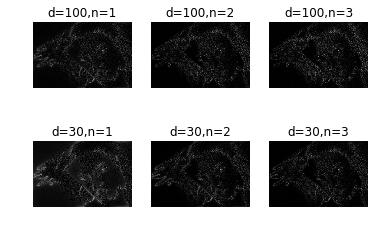

In [18]:
plt.subplot(231)
butter_100_1 = butterworthPassFilter(img,100,1)
plt.imshow(butter_100_1,cmap="gray")
plt.title("d=100,n=1")
plt.axis("off")
plt.subplot(232)
butter_100_2 = butterworthPassFilter(img,100,2)
plt.imshow(butter_100_2,cmap="gray")
plt.title("d=100,n=2")
plt.axis("off")
plt.subplot(233)
butter_100_3 = butterworthPassFilter(img,100,3)
plt.imshow(butter_100_3,cmap="gray")
plt.title("d=100,n=3")
plt.axis("off")
plt.subplot(234)
butter_100_1 = butterworthPassFilter(img,30,1)
plt.imshow(butter_100_1,cmap="gray")
plt.title("d=30,n=1")
plt.axis("off")
plt.subplot(235)
butter_100_2 = butterworthPassFilter(img,30,2)
plt.imshow(butter_100_2,cmap="gray")
plt.title("d=30,n=2")
plt.axis("off")
plt.subplot(236)
butter_100_3 = butterworthPassFilter(img,30,3)
plt.imshow(butter_100_3,cmap="gray")
plt.title("d=30,n=3")
plt.axis("off")
plt.show()

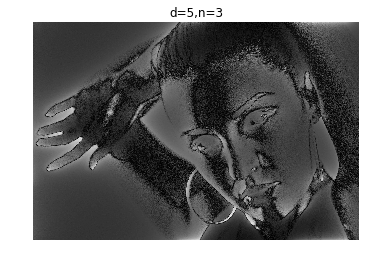

In [19]:
butter_5_1 = butterworthPassFilter(img,5,1)
plt.imshow(butter_5_1,cmap="gray")
plt.title("d=5,n=3")
plt.axis("off")
plt.show()